In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_raw = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_raw['class'] = iris.target

In [7]:
df_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df_raw['class'].unique()

array([0, 1, 2])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_raw.drop(columns='sepal width (cm)'), df_raw['sepal width (cm)'], random_state=42)

In [10]:
X_train.columns

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'class'], dtype='object')

In [11]:
y_train.name

'sepal width (cm)'

In [12]:
categorical_columns = ['class']
numerical_columns = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder())
])

In [14]:
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [15]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

In [16]:
from sklearn.linear_model import LinearRegression

lm = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', LinearRegression())
])

In [17]:
from sklearn import set_config

set_config(display='diagram')

lm.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['class']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('regressor', LinearRegression())])

In [18]:
from sklearn.metrics import median_absolute_error

print("train error: %0.3f, test error: %0.3f" %
      (median_absolute_error(y_train, lm.predict(X_train)),
       median_absolute_error(y_test, lm.predict(X_test))))

train error: 0.163, test error: 0.193


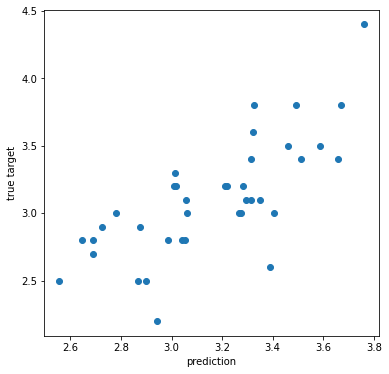

In [19]:
def scatter_predictions(y_pred, y_true):
    plt.figure(figsize=(6, 6))
    plt.xlabel('prediction')
    plt.ylabel('true target')
    plt.scatter(y_pred, y_true)
    
scatter_predictions(lm.predict(X_test), y_test)

In [20]:
print("The hyper-parameters for a linear model are:")
for param_name in LinearRegression().get_params().keys():
    print(param_name)

The hyper-parameters for a linear model are:
copy_X
fit_intercept
n_jobs
normalize


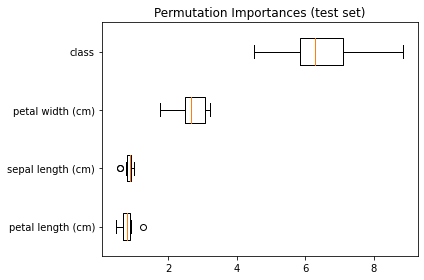

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(lm, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42))
])

In [23]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['class']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [24]:
from sklearn.metrics import median_absolute_error

print("train error: %0.3f, test error: %0.3f" %
      (median_absolute_error(y_train, rf.predict(X_train)),
       median_absolute_error(y_test, rf.predict(X_test))))

train error: 0.060, test error: 0.275


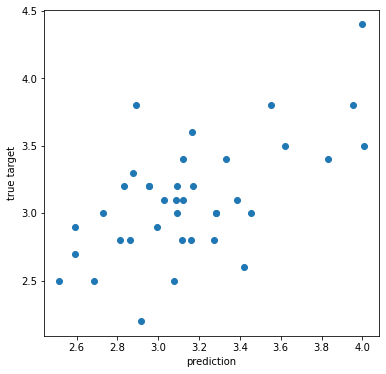

In [25]:
scatter_predictions(rf.predict(X_test), y_test)

In [26]:
print("The hyper-parameters for a random forest model are:")
for param_name in rf.get_params().keys():
    print(param_name)

The hyper-parameters for a random forest model are:
memory
steps
verbose
preprocess
regressor
preprocess__n_jobs
preprocess__remainder
preprocess__sparse_threshold
preprocess__transformer_weights
preprocess__transformers
preprocess__verbose
preprocess__cat
preprocess__num
preprocess__cat__memory
preprocess__cat__steps
preprocess__cat__verbose
preprocess__cat__onehot
preprocess__cat__onehot__categories
preprocess__cat__onehot__drop
preprocess__cat__onehot__dtype
preprocess__cat__onehot__handle_unknown
preprocess__cat__onehot__sparse
preprocess__num__memory
preprocess__num__steps
preprocess__num__verbose
preprocess__num__scaler
preprocess__num__scaler__copy
preprocess__num__scaler__with_mean
preprocess__num__scaler__with_std
regressor__bootstrap
regressor__ccp_alpha
regressor__criterion
regressor__max_depth
regressor__max_features
regressor__max_leaf_nodes
regressor__max_samples
regressor__min_impurity_decrease
regressor__min_impurity_split
regressor__min_samples_leaf
regressor__min_samp

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__max_features': (2, 3, 4),
    'regressor__max_depth': (2, 3, 5),
    'regressor__min_samples_leaf': (1, 3, 5),
}

model_grid_search = GridSearchCV(rf, param_grid=param_grid,
                                 n_jobs=-1, cv=3)
model_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['class']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['sepal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'length '
                                                                          '(cm)',
                                                                          'petal '
                                                                          'width '
                                                                          '(cm)'])])),
                                       ('regressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': (2, 3, 5),
                         'regressor__max_features': (2, 3, 4),
                         'regressor__min_samples_leaf': (1, 3, 5)})

In [28]:
print("train error: %0.3f, test error: %0.3f" %
      (median_absolute_error(y_train, model_grid_search.predict(X_train)),
       median_absolute_error(y_test, model_grid_search.predict(X_test))))

train error: 0.120, test error: 0.201


In [29]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'regressor__max_depth': 5, 'regressor__max_features': 3, 'regressor__min_samples_leaf': 3}


In [30]:
rf_best = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(
        n_estimators=100, max_depth=5, max_features=3, min_samples_leaf=3, n_jobs=-1, random_state=42))
])

In [31]:
rf_best.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['class']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sepal length (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, max_features=3,
                                       min_samples_leaf=3, n_jobs=-1,
                                       random_state=42))])

In [32]:
print("train error: %0.3f, test error: %0.3f" %
      (median_absolute_error(y_train, rf_best.predict(X_train)),
       median_absolute_error(y_test, rf_best.predict(X_test))))

train error: 0.120, test error: 0.201


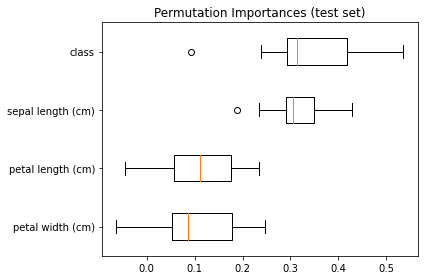

In [33]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_best, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()